# Transport properties in directed Quantum Walks on the line

In [1]:
from qwak.qwak import QWAK

In [2]:
import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp
from scipy import stats

## Bessel equation for the probability distribution

In [3]:
def inf_line_bessel_oriented10(k,nx,t,alpha,theta,gamma,l):
    domain = np.arange(0, nx) - nx//2
    prob = np.zeros([nx + 1,1], dtype='complex')
    for x in range(nx):
        prob[x,0] = ( (np.cos(theta)**2) * (sp.jv(domain[x] + k, 2*t)**2)
                     + (np.sin(theta)**2) * (sp.jv(domain[x] - k, 2*t)**2)
                     + 2*((-1)**k)*np.cos(2*alpha*k + gamma)*np.cos(theta)*np.sin(theta)*sp.jv(domain[x] + k, 2*t)*sp.jv(domain[x] - k, 2*t))

    return prob

In [4]:
def getMultipleProbs(k,n,theta,l,gamma,alphaList,timeList):
    timeListList = [timeList]*len(alphaList)
    probListAux = []
    probList = []

    for alpha in alphaList:
        for t in timeList:
            psi_oriented = inf_line_bessel_oriented10(k,n,t,alpha,theta,gamma,l)
            probListAux.append(np.sum(psi_oriented[n//2-k-1:n//2+k+2]))
        probList.append(probListAux)
        probListAux = []
    
    return probList
    

In [5]:
k = 1
n0 = 100
if k > 0:
    theta=np.pi/4
else:
    theta = np.pi/2
l = 0
gamma = l * np.pi


samples = 30
alphaList = np.concatenate([np.linspace(0,np.pi/2,samples//2),np.linspace(np.pi/2+np.pi/(samples//2),2*np.pi,samples//2)])
print(alphaList)

timeList = np.linspace(50,100,50)

probList = getMultipleProbs(k,n0,theta,l,gamma,alphaList,timeList)

[0.         0.11219974 0.22439948 0.33659921 0.44879895 0.56099869
 0.67319843 0.78539816 0.8975979  1.00979764 1.12199738 1.23419711
 1.34639685 1.45859659 1.57079633 1.78023584 2.10187508 2.42351433
 2.74515358 3.06679283 3.38843208 3.71007132 4.03171057 4.35334982
 4.67498907 4.99662832 5.31826756 5.63990681 5.96154606 6.28318531]


## Decay rate plot

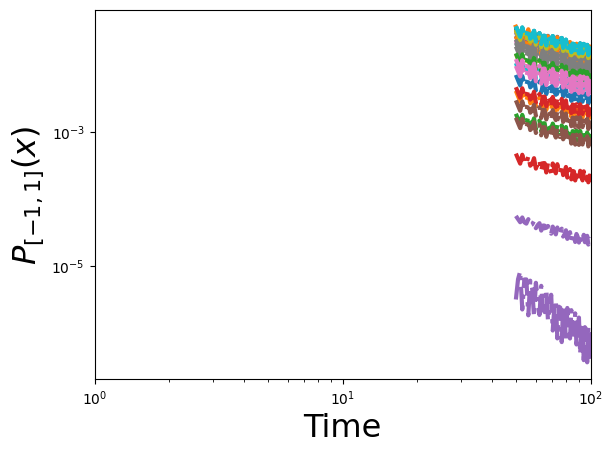

In [6]:
plt.loglog()
i=0
linewidth = 3
for probability,alpha in zip(probList,alphaList):
    if alpha == 0:
        plt.plot(timeList,probability,linestyle='--',linewidth=linewidth,label=r"$\alpha = 0$")
        i+=1
    else:
        if i==1:
            plt.plot(timeList,probability,linestyle='-',linewidth=linewidth,label=r"$\alpha = \frac{\pi}{%s}$"%str(alpha))
            i+=1
        else:
            plt.plot(timeList,probability,linestyle='-.',linewidth=linewidth,label=r"$\alpha = \frac{\pi}{%s}$"%str(alpha))
# plt.plot(cubeFuncList,label="cube")
# plt.plot(invFuncList,label="inverse")
plt.xlim([1,100])
# print(probList)

labelsize = 23
mpl.rcParams['figure.figsize'] = [20,10]
# plt.legend(loc="lower left", ncol=len(alphaList),fontsize=labelsize)
plt.ylabel(r"$P_{[-%s,%s]}(x)$"%(k,k),fontsize=labelsize)
plt.xlabel("Time",fontsize=labelsize)
mpl.rc('xtick', labelsize=labelsize)
mpl.rc('ytick', labelsize=labelsize)
plt.show()

## Alpha vs Decay rate 

In [5]:
k = 1
n0 = 200
if k > 0:
    theta=np.pi/4
else:
    theta = np.pi/2
l = 0
gamma = l * np.pi

# alphaLen =  np.linspace(2,5,20)
# alphaList = [0] + [(np.pi/n) for n in alphaLen]

samples = 500
alphaList = np.concatenate([np.linspace(0,np.pi/2,samples//2),np.linspace(np.pi/2+np.pi/(samples//2),2*np.pi,samples//2)])
# alphaList = [0,np.pi/2]

timeList = np.linspace(50,100,20)

probList = getMultipleProbs(k,n0,theta,l,gamma,alphaList,timeList)

result = []
linReg = 0
for prob in probList:
    linReg = stats.linregress(timeList,prob)
    slope = float(linReg.slope)
    result.append(slope)
    
    

# print(f"AlphaList: {len(alphaList)}\n\t{alphaList}\nTimeList:\n\t{timeList}\nResult:\n\t{result}")
# print(f"\nLinReg:\n\t{stats.linregress(timeList,list(map(lambda x:float(x),probList[0])))}")

KeyboardInterrupt: 

In [ ]:
plt.plot(alphaList,result)